# Stock Market Prediction

In this project I use two machine learning models to predict stock market prices for S&P500, using 10 years of stock price data, New York Times headlines and tweets during that time.

The first model is a Neural Network or Multilayer perceptron, the second is a Recurrent Neural Network.

## 1. Prediction using MLP model

In [3]:
import time
import datetime as dt
import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt
import pandas
import pandas_datareader
import stock_data_preprocessing

## 2. Predict using RNN with LSTM

In [4]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

In [19]:
#Step 1 Load Data

def load_data(filename, seq_len, normalise_window):
    f = open(filename, 'r').read()
    data = f.split('\n')
    print(len(data))
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    #print(result)
    if normalise_window:
        result = normalise_windows(result)

    result = np.array(result)
    print("result len:",len(result))
    print("result shape:",result.shape)
    
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    print('x_train len',x_train.shape)
    print('x_train[0]',x_train[0])
    y_train = train[:, -1]
    print('y_train len',y_train.shape)
    print('y_train[0]',y_train[0])


    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

X_train, y_train, X_test, y_test = load_data('sp500.csv', 50, False)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4172
result len: 4121
result shape: (4121, 51)
x_train len (3709, 50)
x_train[0] ['1455.219971' '1399.420044' '1402.109985' '1403.449951' '1441.469971'
 '1457.599976' '1438.560059' '1432.25' '1449.680054' '1465.150024'
 '1455.140015' '1455.900024' '1445.569946' '1441.359985' '1401.530029'
 '1410.030029' '1404.089966' '1398.560059' '1360.160034' '1394.459961'
 '1409.280029' '1409.119995' '1424.969971' '1424.369995' '1424.23999'
 '1441.719971' '1411.709961' '1416.829956' '1387.119995' '1389.939941'
 '1402.050049' '1387.670044' '1388.26001' '1346.089966' '1352.170044'
 '1360.689941' '1353.430054' '1333.359985' '1348.050049' '1366.420044'
 '1379.189941' '1381.76001' '1409.170044' '1391.280029' '1355.619995'
 '1366.699951' '1401.689941' '1395.069946' '1383.619995' '1359.150024']
y_train len (3709,)
y_train[0] 1392.140015
(3709, 50, 1)
(3709,)
(412, 50, 1)
(412,)


In [6]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : ', time.time() - start)

compilation time :  0.03293275833129883


In [9]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=20,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/20
3523/3523 [==============================] - 7s - loss: 4.1664e-04 - val_loss: 3.1235e-04
Epoch 2/20
3523/3523 [==============================] - 6s - loss: 3.9355e-04 - val_loss: 4.0014e-04

yo


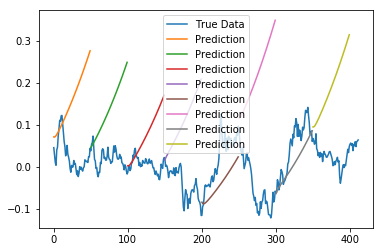

In [8]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)